<a href="https://colab.research.google.com/github/kimanuul/python_lectures/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "pandas"
date: '2022-07-01'
---

## 1. Object Creation

In [1]:
import numpy as np
import pandas as pd

s = pd.Series([1,3, 5, np.nan, 6, 8])
s

dates = pd.date_range("20130101", periods = 6)
dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns = list("ABCD"))
df
df2 = pd.DataFrame(
    {
        "A" : 1.0,
        "B" : pd.Timestamp("20130102"),
        "C" : pd.Series(1, index = list(range(4)), dtype = "float32"),
        "D" : np.array([3] * 4, dtype = "int32"),
        "E" : pd.Categorical(["test", "train", "test", "train"]),
        "F" : "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [2]:
df2.dtypes

# df2.<TAB>  # noqa: E225, E999


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. Viewing Data

In [3]:
df.head()

,A,B,C,D
2013-01-01,1.580244,-1.813754,1.346802,-0.478092
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-03,0.533715,1.019460,-0.885972,-0.365414
2013-01-04,1.040717,0.498139,-0.030969,-0.819359
2013-01-05,0.374281,-1.063864,1.662696,0.564773


In [4]:
df.tail(3)

,A,B,C,D
2013-01-04,1.040717,0.498139,-0.030969,-0.819359
2013-01-05,0.374281,-1.063864,1.662696,0.564773
2013-01-06,-1.228777,0.845534,0.364169,0.044934


In [5]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [7]:
df.values

array([[ 1.58024395, -1.81375421,  1.34680213, -0.4780924 ],
       [ 0.26058385, -2.1640517 , -0.09690525,  0.41889312],
       [ 0.53371489,  1.01946022, -0.8859722 , -0.36541413],
       [ 1.04071735,  0.49813851, -0.03096916, -0.81935907],
       [ 0.3742813 , -1.06386418,  1.66269597,  0.5647728 ],
       [-1.22877738,  0.84553393,  0.36416938,  0.04493416]])

In [8]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.426794,-0.446423,0.393303,-0.105711
std,0.947637,1.407923,0.956893,0.540899
min,-1.228777,-2.164052,-0.885972,-0.819359
25%,0.289008,-1.626282,-0.080421,-0.449923
50%,0.453998,-0.282863,0.166600,-0.160240
75%,0.913967,0.758685,1.101144,0.325403
max,1.580244,1.019460,1.662696,0.564773


In [9]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.580244,0.260584,0.533715,1.040717,0.374281,-1.228777
B,-1.813754,-2.164052,1.019460,0.498139,-1.063864,0.845534
C,1.346802,-0.096905,-0.885972,-0.030969,1.662696,0.364169
D,-0.478092,0.418893,-0.365414,-0.819359,0.564773,0.044934


In [10]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,-0.478092,1.346802,-1.813754,1.580244
2013-01-02,0.418893,-0.096905,-2.164052,0.260584
2013-01-03,-0.365414,-0.885972,1.019460,0.533715
2013-01-04,-0.819359,-0.030969,0.498139,1.040717
2013-01-05,0.564773,1.662696,-1.063864,0.374281
2013-01-06,0.044934,0.364169,0.845534,-1.228777


In [11]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-01,1.580244,-1.813754,1.346802,-0.478092
2013-01-05,0.374281,-1.063864,1.662696,0.564773
2013-01-04,1.040717,0.498139,-0.030969,-0.819359
2013-01-06,-1.228777,0.845534,0.364169,0.044934
2013-01-03,0.533715,1.019460,-0.885972,-0.365414


## 3. Selection

- Getting

In [12]:
df['A']

2013-01-01    1.580244
2013-01-02    0.260584
2013-01-03    0.533715
2013-01-04    1.040717
2013-01-05    0.374281
2013-01-06   -1.228777
Freq: D, Name: A, dtype: float64

In [13]:
df[0:3]

,A,B,C,D
2013-01-01,1.580244,-1.813754,1.346802,-0.478092
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-03,0.533715,1.019460,-0.885972,-0.365414


In [14]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-03,0.533715,1.019460,-0.885972,-0.365414
2013-01-04,1.040717,0.498139,-0.030969,-0.819359


- Selection by Label

In [15]:
df.loc[dates[0]]

A    1.580244
B   -1.813754
C    1.346802
D   -0.478092
Name: 2013-01-01 00:00:00, dtype: float64

In [16]:
df.loc[ : ,['A', 'B']]

,A,B
2013-01-01,1.580244,-1.813754
2013-01-02,0.260584,-2.164052
2013-01-03,0.533715,1.019460
2013-01-04,1.040717,0.498139
2013-01-05,0.374281,-1.063864
2013-01-06,-1.228777,0.845534


In [17]:
df.loc['20130102' : '20130104', ['A', 'B']]

,A,B
2013-01-02,0.260584,-2.164052
2013-01-03,0.533715,1.019460
2013-01-04,1.040717,0.498139


In [18]:
df.loc['20130102', ['A', 'B']]

A    0.260584
B   -2.164052
Name: 2013-01-02 00:00:00, dtype: float64

In [19]:
df.at[dates[0], 'A']

1.5802439478261552

- Selection by Position

In [20]:
df.iloc[3]

A    1.040717
B    0.498139
C   -0.030969
D   -0.819359
Name: 2013-01-04 00:00:00, dtype: float64

In [21]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.040717,0.498139
2013-01-05,0.374281,-1.063864


In [22]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.260584,-0.096905
2013-01-03,0.533715,-0.885972
2013-01-05,0.374281,1.662696


In [23]:
df.iloc[1 : 3, : ]

,A,B,C,D
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-03,0.533715,1.019460,-0.885972,-0.365414


In [24]:
df.iloc[ : , 1 : 3]

,B,C
2013-01-01,-1.813754,1.346802
2013-01-02,-2.164052,-0.096905
2013-01-03,1.019460,-0.885972
2013-01-04,0.498139,-0.030969
2013-01-05,-1.063864,1.662696
2013-01-06,0.845534,0.364169


In [25]:
df.iloc[1 , 1]

-2.1640517036045632

- Boolean Indexing

In [26]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.580244,-1.813754,1.346802,-0.478092
2013-01-02,0.260584,-2.164052,-0.096905,0.418893
2013-01-03,0.533715,1.019460,-0.885972,-0.365414
2013-01-04,1.040717,0.498139,-0.030969,-0.819359
2013-01-05,0.374281,-1.063864,1.662696,0.564773


In [27]:
df[df > 0]

,A,B,C,D
2013-01-01,1.580244,NaN,1.346802,NaN
2013-01-02,0.260584,NaN,NaN,0.418893
2013-01-03,0.533715,1.019460,NaN,NaN
2013-01-04,1.040717,0.498139,NaN,NaN
2013-01-05,0.374281,NaN,1.662696,0.564773
2013-01-06,NaN,0.845534,0.364169,0.044934


In [28]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,1.580244,-1.813754,1.346802,-0.478092,one
2013-01-02,0.260584,-2.164052,-0.096905,0.418893,one
2013-01-03,0.533715,1.019460,-0.885972,-0.365414,two
2013-01-04,1.040717,0.498139,-0.030969,-0.819359,three
2013-01-05,0.374281,-1.063864,1.662696,0.564773,four
2013-01-06,-1.228777,0.845534,0.364169,0.044934,three


In [29]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.533715,1.019460,-0.885972,-0.365414,two
2013-01-05,0.374281,-1.063864,1.662696,0.564773,four


- Setting

In [30]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [31]:
df['F'] = s1
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[ :, 'D'] = np.array([5]*len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.346802,5,NaN
2013-01-02,0.260584,-2.164052,-0.096905,5,1.0
2013-01-03,0.533715,1.019460,-0.885972,5,2.0
2013-01-04,1.040717,0.498139,-0.030969,5,3.0
2013-01-05,0.374281,-1.063864,1.662696,5,4.0
2013-01-06,-1.228777,0.845534,0.364169,5,5.0


In [32]:
df2 = df.copy()
df2[df2 > 0] = -df2

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.346802,5,NaN
2013-01-02,0.260584,-2.164052,-0.096905,5,1.0
2013-01-03,0.533715,1.019460,-0.885972,5,2.0
2013-01-04,1.040717,0.498139,-0.030969,5,3.0
2013-01-05,0.374281,-1.063864,1.662696,5,4.0
2013-01-06,-1.228777,0.845534,0.364169,5,5.0


## 4. Missing Data

In [33]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.346802,5,NaN,1.0
2013-01-02,0.260584,-2.164052,-0.096905,5,1.0,1.0
2013-01-03,0.533715,1.019460,-0.885972,5,2.0,NaN
2013-01-04,1.040717,0.498139,-0.030969,5,3.0,NaN


In [34]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.260584,-2.164052,-0.096905,5,1.0,1.0


In [35]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.346802,5,5.0,1.0
2013-01-02,0.260584,-2.164052,-0.096905,5,1.0,1.0
2013-01-03,0.533715,1.019460,-0.885972,5,2.0,5.0
2013-01-04,1.040717,0.498139,-0.030969,5,3.0,5.0


In [36]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


- Stats

## 5. Operation

In [37]:
df.mean()

A    0.163420
B   -0.144131
C    0.393303
D    5.000000
F    3.000000
dtype: float64

In [38]:
df.mean(1)

2013-01-01    1.586701
2013-01-02    0.799925
2013-01-03    1.533441
2013-01-04    1.901577
2013-01-05    1.994623
2013-01-06    1.996185
Freq: D, dtype: float64

In [39]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [40]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.466285,0.019460,-1.885972,4.0,1.0
2013-01-04,-1.959283,-2.501861,-3.030969,2.0,0.0
2013-01-05,-4.625719,-6.063864,-3.337304,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


- Apply

In [41]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.346802,5,NaN
2013-01-02,0.260584,-2.164052,1.249897,10,1.0
2013-01-03,0.794299,-1.144591,0.363925,15,3.0
2013-01-04,1.835016,-0.646453,0.332956,20,6.0
2013-01-05,2.209297,-1.710317,1.995651,25,10.0
2013-01-06,0.980520,-0.864783,2.359821,30,15.0


In [42]:
df.apply(lambda x: x.max() - x.min())

A    2.269495
B    3.183512
C    2.548668
D    0.000000
F    4.000000
dtype: float64

- Histogramming

In [43]:
s = pd.Series(np.random.randint(0, 7, size = 10))

s

0    0
1    1
2    1
3    1
4    6
5    1
6    6
7    4
8    3
9    0
dtype: int64

- String Methods

In [44]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. Merge

- Concat

In [45]:
df = pd.DataFrame(np.random.randn(10, 4))
df
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.018229,-0.152176,0.097248,0.170610
1,-1.132482,-0.489799,0.817970,1.053807
2,-0.141365,-0.049291,1.410638,-1.157921
3,0.878355,-0.203938,-0.645934,-0.005953
4,0.944436,-0.501251,-1.813051,-1.077529
5,0.427366,-0.555614,-0.361333,1.259146
6,0.553281,1.134001,-1.401313,-0.090745
7,0.011364,-0.067226,-1.191702,-0.764635
8,0.849876,-0.632471,-1.401694,1.578065
9,-0.008384,1.169144,-0.671800,-0.132365


- Join

In [46]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval" : [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left
right

pd.merge(left, right, on = "key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


- Append

In [47]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

s = df.iloc[3]
df.append(s, ignore_index = True)

,A,B,C,D
0,-1.066066,-0.489266,-0.177328,-0.974128
1,0.876355,-0.808711,2.351288,1.082203
2,-1.155975,0.254673,-0.910764,-1.287700
3,-1.580466,0.362859,-1.257308,0.237111
4,-0.881262,-0.740368,-1.043671,1.138480
5,0.217776,-1.531427,0.898129,-0.581400
6,-0.116578,0.604319,1.291319,-0.148530
7,0.883823,-0.248003,-0.583554,-0.332185
8,-1.580466,0.362859,-1.257308,0.237111


## 7. Grouping

In [48]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    }
)

df

df.groupby('A').sum()
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.658946 -0.633284
    three  1.029431  0.078571
    two   -0.127440  0.214058
foo one    1.459328  1.140434
    three  0.889766  0.955963
    two    1.621576  1.839064

## 8.Reshaping

- Stack

In [49]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'twp']]
                  )
)

index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])
df2 = df[:4]
df2

stacked = df2.stack()
stacked

stacked.unstack()

stacked.unstack(1)
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.466899 -0.144197
       B  0.387549  0.609389
two    A  0.330315  1.319903
       B  0.360036 -2.807350

- Pivot Tables

In [50]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three']*3,
                   'B' : ['A', 'B', 'C']*4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar']*2,
                   'D' : np.random.randn(12),
                   'E' : np.random.rand(12)})

df

,A,B,C,D,E
0,one,A,foo,-0.019345,0.984925
1,one,B,foo,1.867276,0.467960
2,two,C,foo,0.173838,0.467686
3,three,A,bar,1.123150,0.375155
4,one,B,bar,1.047492,0.623239
5,one,C,bar,0.059504,0.415928
6,two,A,foo,-0.043074,0.694907
7,three,B,foo,-0.387194,0.898649
8,one,C,foo,1.297150,0.111294
9,one,A,bar,0.339154,0.840519


In [51]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A  0.339154 -0.019345
      B  1.047492  1.867276
      C  0.059504  1.297150
three A  1.123150       NaN
      B       NaN -0.387194
      C  1.698837       NaN
two   A       NaN -0.043074
      B -1.287821       NaN
      C       NaN  0.173838

## 9. Time Series

In [52]:
rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
ts.resample('5Min').sum()

2012-01-01    22953
Freq: 5T, dtype: int64

In [53]:
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.541126
2012-03-07   -0.165915
2012-03-08   -0.243394
2012-03-09   -0.806257
2012-03-10    0.154134
Freq: D, dtype: float64

In [54]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.541126
2012-03-07 00:00:00+00:00   -0.165915
2012-03-08 00:00:00+00:00   -0.243394
2012-03-09 00:00:00+00:00   -0.806257
2012-03-10 00:00:00+00:00    0.154134
Freq: D, dtype: float64

In [55]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.541126
2012-03-06 19:00:00-05:00   -0.165915
2012-03-07 19:00:00-05:00   -0.243394
2012-03-08 19:00:00-05:00   -0.806257
2012-03-09 19:00:00-05:00    0.154134
Freq: D, dtype: float64

In [56]:
rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-01-31    0.711120
2012-02-29   -1.624670
2012-03-31    1.735090
2012-04-30   -0.922070
2012-05-31    0.103781
Freq: M, dtype: float64

In [57]:
ps = ts.to_period()
ps

2012-01    0.711120
2012-02   -1.624670
2012-03    1.735090
2012-04   -0.922070
2012-05    0.103781
Freq: M, dtype: float64

In [58]:
ps.to_timestamp()

2012-01-01    0.711120
2012-02-01   -1.624670
2012-03-01    1.735090
2012-04-01   -0.922070
2012-05-01    0.103781
Freq: MS, dtype: float64

In [59]:
prng = pd.period_range('1990Q1', '2000Q4', freq = 'Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M','e') + 1).asfreq('H', 's') +9
ts.head()

1990-03-01 09:00   -0.673768
1990-06-01 09:00    0.117779
1990-09-01 09:00   -0.265954
1990-12-01 09:00    0.500478
1991-03-01 09:00    1.675064
Freq: H, dtype: float64

## 10. Categoricals

In [60]:
df = pd.DataFrame({"id" : [1, 2, 3, 4, 5, 6], "raw_grade" : ['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [61]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [62]:
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [63]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11. Plotting

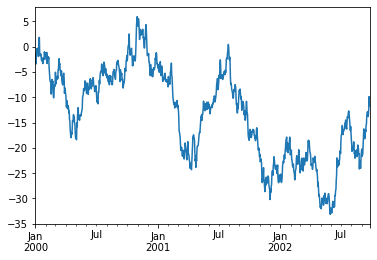

In [64]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts = ts.cumsum()
ts.plot()

In [65]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index,
                  columns = ['A', 'B', 'C', 'D'])
df = df.cumsum()

## 12. Getting Data In / Out

- csv

In [66]:
df.to_csv('foo.csv')

In [67]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.762059,0.832950,0.851277,-1.454157
1,2000-01-02,1.789607,-0.998533,0.279105,-3.115422
2,2000-01-03,3.634484,-0.958267,0.264312,-2.258246
3,2000-01-04,3.285132,-2.510176,0.523553,-1.504111
4,2000-01-05,3.415106,-0.084632,0.972811,-1.397552
...,...,...,...,...,...
995,2002-09-22,-43.912803,-0.470458,-3.042811,9.225186
996,2002-09-23,-42.564338,-1.076681,-3.235775,9.288858
997,2002-09-24,-42.251704,-0.970147,-2.772305,8.895396
998,2002-09-25,-42.132752,0.263336,-3.568966,8.884341


- HDF5

In [68]:
df.to_hdf('foo.h5', 'df')
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.762059,0.832950,0.851277,-1.454157
2000-01-02,1.789607,-0.998533,0.279105,-3.115422
2000-01-03,3.634484,-0.958267,0.264312,-2.258246
2000-01-04,3.285132,-2.510176,0.523553,-1.504111
2000-01-05,3.415106,-0.084632,0.972811,-1.397552
...,...,...,...,...
2002-09-22,-43.912803,-0.470458,-3.042811,9.225186
2002-09-23,-42.564338,-1.076681,-3.235775,9.288858
2002-09-24,-42.251704,-0.970147,-2.772305,8.895396
2002-09-25,-42.132752,0.263336,-3.568966,8.884341


- Excel

In [69]:
df.to_excel('foo.xlsx', sheet_name = 'sheet1')
pd.read_excel('foo.xlsx', 'sheet1', index_col = None, na_values = ['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.762059,0.832950,0.851277,-1.454157
1,2000-01-02,1.789607,-0.998533,0.279105,-3.115422
2,2000-01-03,3.634484,-0.958267,0.264312,-2.258246
3,2000-01-04,3.285132,-2.510176,0.523553,-1.504111
4,2000-01-05,3.415106,-0.084632,0.972811,-1.397552
...,...,...,...,...,...
995,2002-09-22,-43.912803,-0.470458,-3.042811,9.225186
996,2002-09-23,-42.564338,-1.076681,-3.235775,9.288858
997,2002-09-24,-42.251704,-0.970147,-2.772305,8.895396
998,2002-09-25,-42.132752,0.263336,-3.568966,8.884341


## 13. Gotchas

In [70]:
if pd.Series([False, True, False])is not None:
  print("I was not None")

I was not None
